In [2]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Generates visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os


In [4]:

# Load analyzed reviews
df_reviews = pd.read_csv('data/analyzed_reviews.csv')


In [5]:

# Set plot style
sns.set(style='whitegrid')


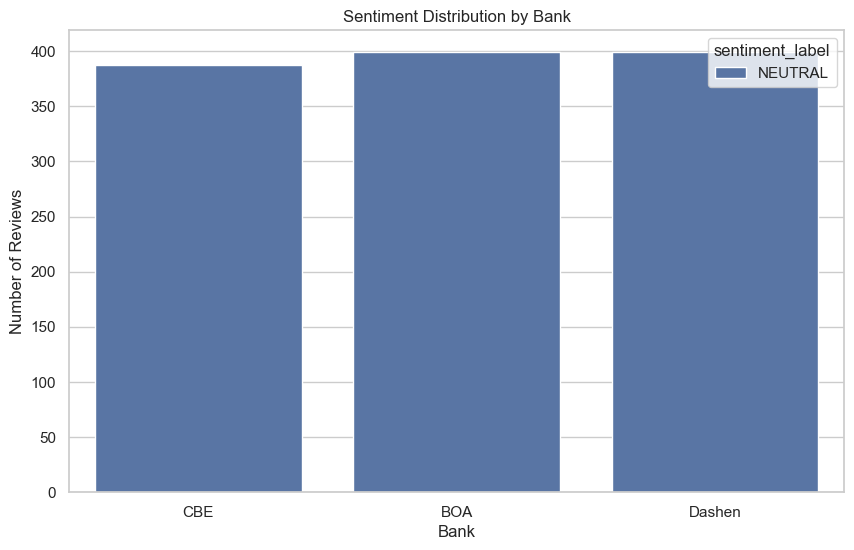

In [11]:

# Sentiment distribution by bank
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reviews, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.savefig('data/sentiment_distribution.png')
plt.show()


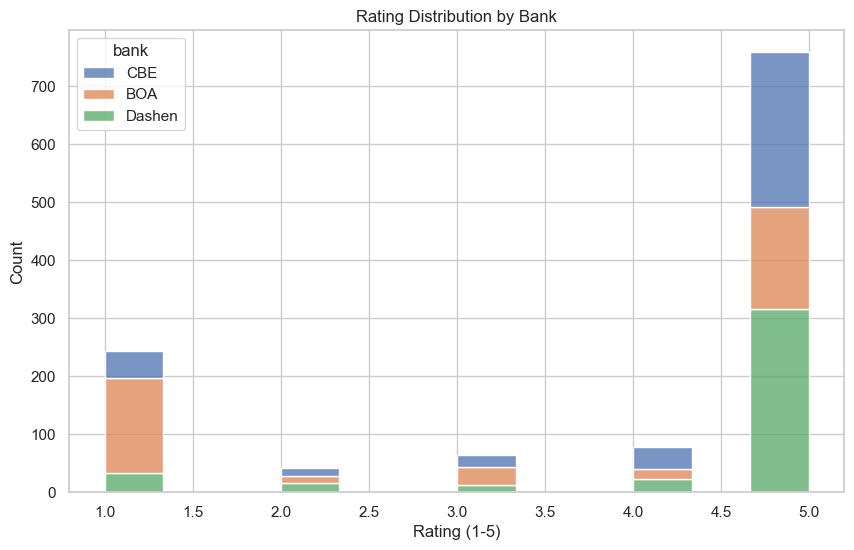

In [12]:

# Rating distribution by bank
plt.figure(figsize=(10, 6))
sns.histplot(data=df_reviews, x='rating', hue='bank', multiple='stack')
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')
plt.savefig('data/rating_distribution.png')
plt.show()


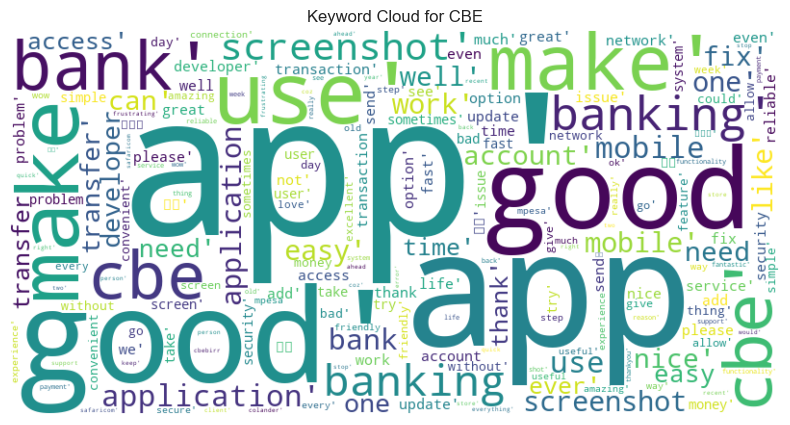

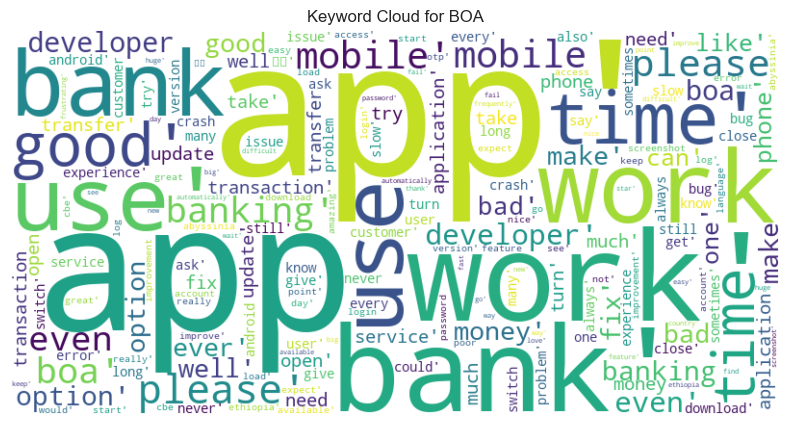

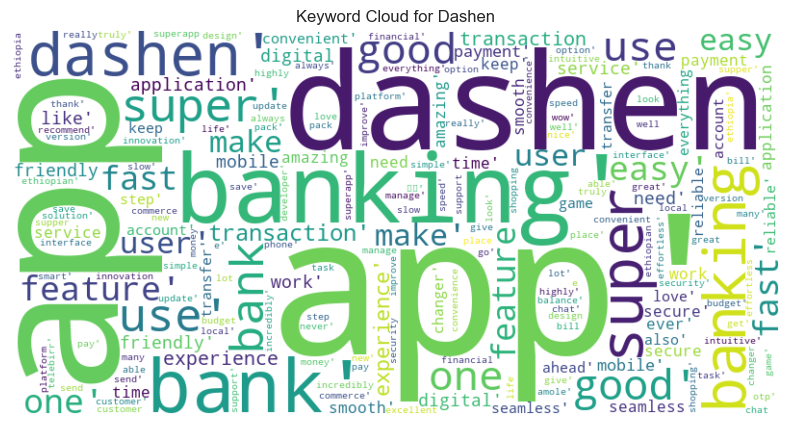

In [15]:

os.makedirs('data/wordclouds', exist_ok=True)
for bank in df_reviews['bank'].unique():
  # Ensure keywords are joined as words, not letters
  keywords_list = df_reviews[df_reviews['bank'] == bank]['keywords']
  if isinstance(keywords_list.iloc[0], list):
    keywords = ' '.join([kw for sublist in keywords_list for kw in sublist])
  else:
    keywords = ' '.join(keywords_list.astype(str))
  wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(keywords)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Keyword Cloud for {bank}')
  plt.savefig(f'data/wordclouds/{bank}_wordcloud.png')
  plt.show()


In [ ]:

print("Visualizations saved to data/ directory")